# Minimum Phase Filters

Remember linear phase flters. Its phase function is linear:
$$ϕ(Ω)=−Ω⋅d$$
with a group delay of constant d. The impulse responses of linear phase flters have the property of being (even) symmetric around some center. Example:

![Minimum Phase Filter](minphfilt.JPG)

Here we have a 4 sample impulse response, and starting at 0, we have a symmetry around $d = 1.5$, hence we have a constant delay of this system of $d = 1.5$ samples. Another example for a linear phase filter is a piece of a sinc function. In Python:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

hsinc = np.sinc(np.linspace(-2,2,11))
print hsinc

[ -3.89817183e-17  -1.89206682e-01  -1.55914881e-01   2.33872321e-01
   7.56826729e-01   1.00000000e+00   7.56826729e-01   2.33872321e-01
  -1.55914881e-01  -1.89206682e-01  -3.89817183e-17]


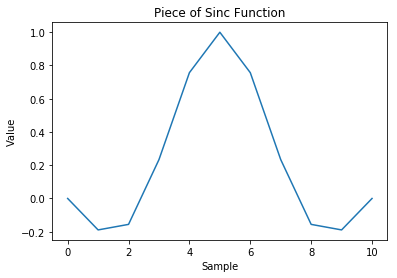

In [2]:
plt.plot(hsinc)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Piece of Sinc Function')

This FIR flter has a constant delay factor of $d=5$ (starting to count the samples at 0 instead of 1 in the plot).

The delay factor $d$ is the center of the impulse response, and we can factor it out from the DTFT of the symmetric impulse response:
### $$ H(e^{jΩ}) = \sum\limits_{n=0}^{2d} h(n).e^{-jΩn}$$
We factor out the center exponential,
### $$ H(e^{jΩ}) = e^{-jΩd} \sum\limits_{n=0}^{2d} h(n).e^{-jΩ(n-d)}$$
since $h(d-n)=h(d+n)$ we get:
### $$ H(e^{jΩ}) = e^{-jΩd} \sum\limits_{n=0}^{d} h(n).(e^{-jΩ(d-n)}+ e^{jΩ(d-n)})$$

### $$ H(e^{jΩ}) = e^{-jΩd} \sum\limits_{n=0}^{d} h(n) \cdot 2 \cdot cos(Ω(d-n))$$
Hence the phase is:
### $$angle (H(e^{jΩ})) = ϕ(Ω) = -dΩ$$

Hence here we showed that any **symmetric** filter has a **linear phase**.

Now we can plot its zeros in the zplane, using the command “zplane”:

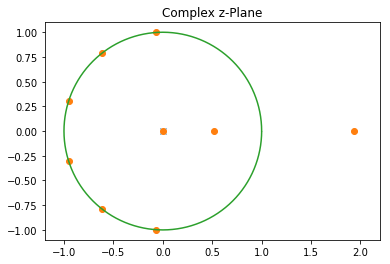

()

In [3]:
from zplane import *
hsinc = np.sinc(np.linspace(-2, 2, 11))
zplane(np.roots(hsinc), 0, [-1.1, 2.1, -1.1, 1.1])

Observe the zeros near 1.9 and near 0.5, and on the unit circle. Its zeros are computed with the command “roots”(from numpy), and their magnitude with “abs”:

In [4]:
abs(np.roots(hsinc))

array([  4.85372863e+15,   1.93092871e+00,   9.99999925e-01,
         9.99999925e-01,   1.00000011e+00,   1.00000011e+00,
         9.99999953e-01,   9.99999953e-01,   5.17885523e-01,
         2.06057359e-16])

Here we can see that we have one zero atlocation 0, and one at infnity, 6 zeros are on the unit circle, one 1 at distance 1.9309 from the origin, and one is at distance $5.1789e-01=1/1.9309$.

Hence for those two zeros we have one zero inside the unit circle at distance $r$, and one outside the unit circle at distance $1/r$.

Linear phase systems and filters have the property, that their **zeros are inside and outside the unit circle** in the z-domain. For stability, only poles need to be inside the unit circle, not the zeros. But if we want to invert such a filter (for instance for equalization purposes), the zeros turn into poles, and the **zeros outside the unit circle** turn into **poles outside the unit circle**, making the **inverse flter unstable**!

To avoid the instability of the inverse fiter, we define **minimum phase filters** such that their **inverse is also stable!**

This means, all their **zeros need to be inside the unit circle** in the z-domain.

We can write all linear filters as a concatenation of a minimum phase filter with an allpass filter,
### $$H(z)=H_{min}(z)\cdot H_{ap}(z)$$
This can be seen from a (hypothetical) minimum phase system $H_{min}(z)$, which has all its zeros inside the unit circle. Now we
concatenate/multiply it with an allpass filter, such that its **poles coincide** with some of the **zeros** of the minimum phase filter inside the unit circle. These poles and zeros then **cancel**, and what is left is the zeros of the allpass filter outside the unit circle at a **reverse conjugate position** $1/a'$, if $"a”$ was the position of the original zero. In this way, we can **„mirror out“ zeros from inside the unit circle to the outside**. The **magnitude response does not change**, because we used an allpass (with magnitude 1) for mirroring out the zeros. As a result we have a system with the **same magnitude response**, but now with **zeros outside** the unit circle.

Assume we would like to equalize or compensate a given transfer function, for instance from a recording. As we saw above, this transfer function can be written as the product
### $$H(z)=H_{min}(z)\cdot H_{ap}(z)$$
Only $H_{min}(z)$ has a stable inverse. Hence we design our compensation flter as
### $$ H_c(z)=\frac{1}{H_{min}(z)}$$
If we apply this compensation filter after our given transfer function, for instance from a recording, we obtain the overall system function as,
### $$G(z) = H(z). H_c(z) = H_{ap} (z)$$
This means the overall transfer function now is an allpass, with a constant magnitude response and only phase changes. (see also A. Oppenheim, R. Schafer: “Discrete Time Signal Processing”, Prentice Hall)

How can we obtain a minimum phase version from a given filter? We basically “mirror in” the zeros from outside the unit circle. Take our above example of the piece of the sinc function filter.

In Python we compute the zeros with

In [5]:
rt = np.roots(hsinc)
rt

array([ -4.85372863e+15+0.j        ,   1.93092871e+00+0.j        ,
        -9.53697827e-01+0.3007662j ,  -9.53697827e-01-0.3007662j ,
        -6.11572262e-01+0.79118872j,  -6.11572262e-01-0.79118872j,
        -7.11596856e-02+0.99746489j,  -7.11596856e-02-0.99746489j,
         5.17885523e-01+0.j        ,  -2.06057359e-16+0.j        ])

We see the zero at 1.93 which we need to mirror in (we neglect the zero at infnity, which comes from starting with a zero sample). To achieve this, we first take the z-domain polynomial of the impulse response, and cancel that zero by dividing by the polynomial with only that zero, $1−1.93⋅z^{−1}$. Fortunately we have the function “deconv”, which is identical to polynomial division, to do this:

In [6]:
import scipy.signal as sp
[b, r] = sp.deconvolve(hsinc, [1,-rt[1]])
b

array([ -3.89817183e-17+0.j,  -1.89206682e-01+0.j,  -5.21259495e-01+0.j,
        -7.72642602e-01+0.j,  -7.35091052e-01+0.j,  -4.19408415e-01+0.j,
        -5.30210197e-02+0.j,   1.31492512e-01+0.j,   9.79877853e-02+0.j,
         7.45511113e-07+0.j])

Here, r is the remainder. In our case it is practically zero, which means we can indeed divide our polynomial without any remainder, which we expect since the zero we divide by was in the polynomial, so that we can always factor it out. After that we can multiply the obtained polynomial b with the zero inside the unit circle, at position $1/1.93$, by multiplying it with the polynomial with only that zero:$1−1/1.93⋅z^{−1}$:

In [7]:
hsincmp = sp.convolve(b,[1,-1/rt[1].conjugate()])
hsincmp

array([ -3.89817183e-17+0.j,  -1.89206682e-01+0.j,  -4.23272096e-01+0.j,
        -5.02689862e-01+0.j,  -3.34950643e-01+0.j,  -3.87154099e-02+0.j,
         1.64184521e-01+0.j,   1.58951330e-01+0.j,   2.98897187e-02+0.j,
        -5.07457087e-02+0.j,  -3.86089404e-07+0.j])

This hsincmp is now our **minimum phase version** of our filter!

Now we can take a look at the impulse response:

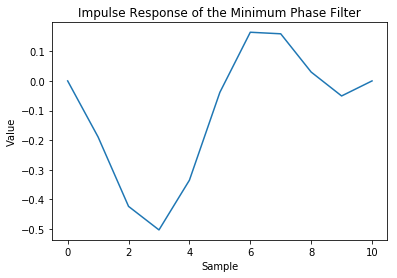

In [8]:
plt.plot(hsincmp)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Impulse Response of the Minimum Phase Filter')

Observe that our filter now became **non-symmetric**, with the main peak at the beginning of the impulse response!<br />
The resulting frequency response is obtained with,

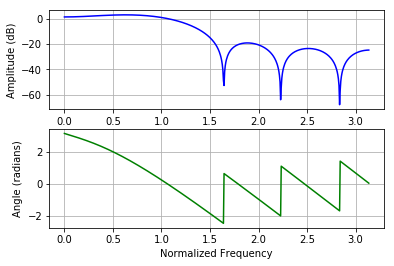

In [9]:
from freqz import *
freqz(hsincmp)

Now compare the above frequency response of our minimum phase filter with the linear phase version, with,

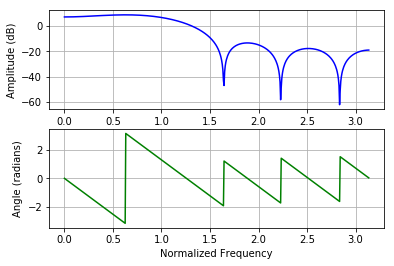

In [10]:
freqz(hsinc)

Here we can see that the magnitude of the frequency plot is indeed identical between the linear phase and the minimum phase version (except for an oﬀset of about 5 dB, which is not important because it is a constant gain factor). But looking at the phase, we see that the minimum phase version has less phase lag. Looking at normalized frequency 1.5, we see that the linear phase flter has a phase lag of about $-2\pi -1$ Rad’s, whereas, the minimum phase filter has a **reduced phase lag** of about -5 Rad’s (from frequency zero to 1.5)! If we take the derivative of the phase function to obtain the group delay, we will get correspondingly lower values, which means the minimum phase filter will have less group delay than the linear phase flter. In fact, it has the lowest possible delay for the given magnitude response of the flter. So if you have a given magnitude filter design, and want to obtain the lowest possible delay, you have to take minimum phase filters.